In [ ]:
'''GOAL
Do trending videos tend to be from the same creator is there a more diverse pool? It seems obvious that popular 
people will tend to have more trending videos, but how easy is it for someone who doesn't have many subs to get a 
trending video

Make a dictionary and have counts of videos from each creator
'''

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('dataframe.csv')
df_all_timestamps = pd.read_csv('dataframe_all_timestamps.csv')

In [5]:
# makes new columns by taking the logarithm of the views, likes, 
#dislikes and comment_count to compress the scale for easier graphing 

import numpy as np
df.loc[:,'log_views'] = np.log(df.loc[:,'views']+1)
df.loc[:,'log_likes'] = np.log(df.loc[:,'likes']+1)
df.loc[:,'log_dislikes'] = np.log(df.loc[:,'dislikes']+1)
df.loc[:,'log_comment_count'] = np.log(df.loc[:,'comment_count']+1)

#show all columns
pd.set_option('display.max_columns', 100)

In [30]:
df.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count
0,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR,9.877554,7.375882,3.178054,5.375278
1,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR,9.940061,6.940222,6.326149,5.497168
2,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR,12.242660,7.255591,5.003946,4.510860
3,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR,9.674074,4.962845,2.397895,2.079442
4,u6EoWM2KMPE,2017-11-14,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,http://top-channel.tv/programe/portokalli/,FR,11.518987,7.056175,3.891820,3.583519


In [6]:
US_bool = df.country == 'US'

US_trending= df.loc[US_bool]
US_trending.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count
310,o78x918zbFk,2017-11-14,TOTAL FAIL! NATASHA DENONA HOLIDAY WTF,Tati,26,Howto & Style,2017-11-08,18:00:05,"YouTube|""Beauty""|""Makeup""|""Tutorial""|""Review""|...",1277364,56867,2148,25326,https://i.ytimg.com/vi/o78x918zbFk/default.jpg,False,False,False,This was the most UNEXPECTED WTF I've done so ...,US,14.060310,10.948488,7.672758,10.139626
311,6ixU_vdE0Es,2017-11-14,BOYFRIEND DOES MY MAKEUP | Madelaine Petsch,Madelaine Petsch,22,People & Blogs,2017-11-08,22:13:18,"madelaine|""madelainepetsch""|""madelaine petsch""...",280065,20289,38,939,https://i.ytimg.com/vi/6ixU_vdE0Es/default.jpg,False,False,False,I asked Travis to replicate my everyday makeup...,US,12.542781,9.917883,3.663562,6.845880
312,wRGldR_SQAA,2017-11-14,Apple Clips sample,Steve Kovach,22,People & Blogs,2017-11-09,18:01:04,[none],2259,0,0,0,https://i.ytimg.com/vi/wRGldR_SQAA/default.jpg,False,False,False,Clips 2.0 lets you use augmented reality and s...,US,7.723120,0.000000,0.000000,0.000000
313,agKDPntMv-E,2017-11-14,Stephen A. Smith slams the Philadelphia 76ers ...,ESPN,17,Sports,2017-11-08,15:59:06,"espn|""espn live""|""first take""|""first take espn...",470191,4037,430,1553,https://i.ytimg.com/vi/agKDPntMv-E/default.jpg,False,False,False,First Take's Stephen A. Smith slams the Philad...,US,13.060896,8.303505,6.066108,7.348588
314,Xl38SuxyrgM,2017-11-14,"STEPH CURRY and OMRI CASSPI, postgame GSW (9-3...",LetsGoWarriors,17,Sports,2017-11-09,07:27:32,"DubNation|""Golden State Warriors""|""Golden Stat...",16305,147,13,47,https://i.ytimg.com/vi/Xl38SuxyrgM/default.jpg,False,False,False,Previous video: Draymond postgame https://yout...,US,9.699288,4.997212,2.639057,3.871201


In [7]:
# key = channel title, value = count of each channel title

# df.channel_title.keys()
# US_trending.groupby(['channel_title']).groups.keys() # 1897

# this is a dictionary -> US_trending.groupby(['channel_title']).groups

# to print the amount
# print(len(US_trending.groupby(['channel_title']).groups['1MILLION Dance Studio']))

# len(US_trending.groupby(['channel_title']).groups)
US_channel_counts = US_trending.groupby(['channel_title']).size().reset_index(name='counts')

In [8]:
# print(US_trending.groupby(['channel_title']).groups['12 News'])
print(len(US_trending.groupby(['channel_title']).groups['1MILLION Dance Studio']))

4


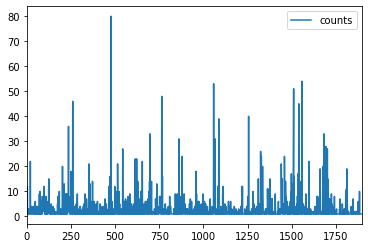

In [9]:
US_channel_counts.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2378b3c8>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

/Users/galvanize/ENTER/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/galvanize/ENTER/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/galvanize/ENTER/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/galvanize/ENTER/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/galvanize/ENTER/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/galvanize/ENTER/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:1

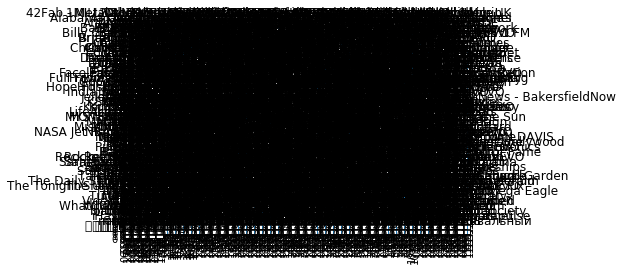

In [97]:
#THIS WAS A TERRIBLE MISTAKE

US_channel_counts.hist(by='channel_title')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19d6f4e0>]],
      dtype=object)

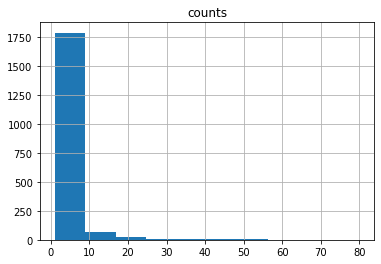

In [10]:
US_channel_counts.hist()

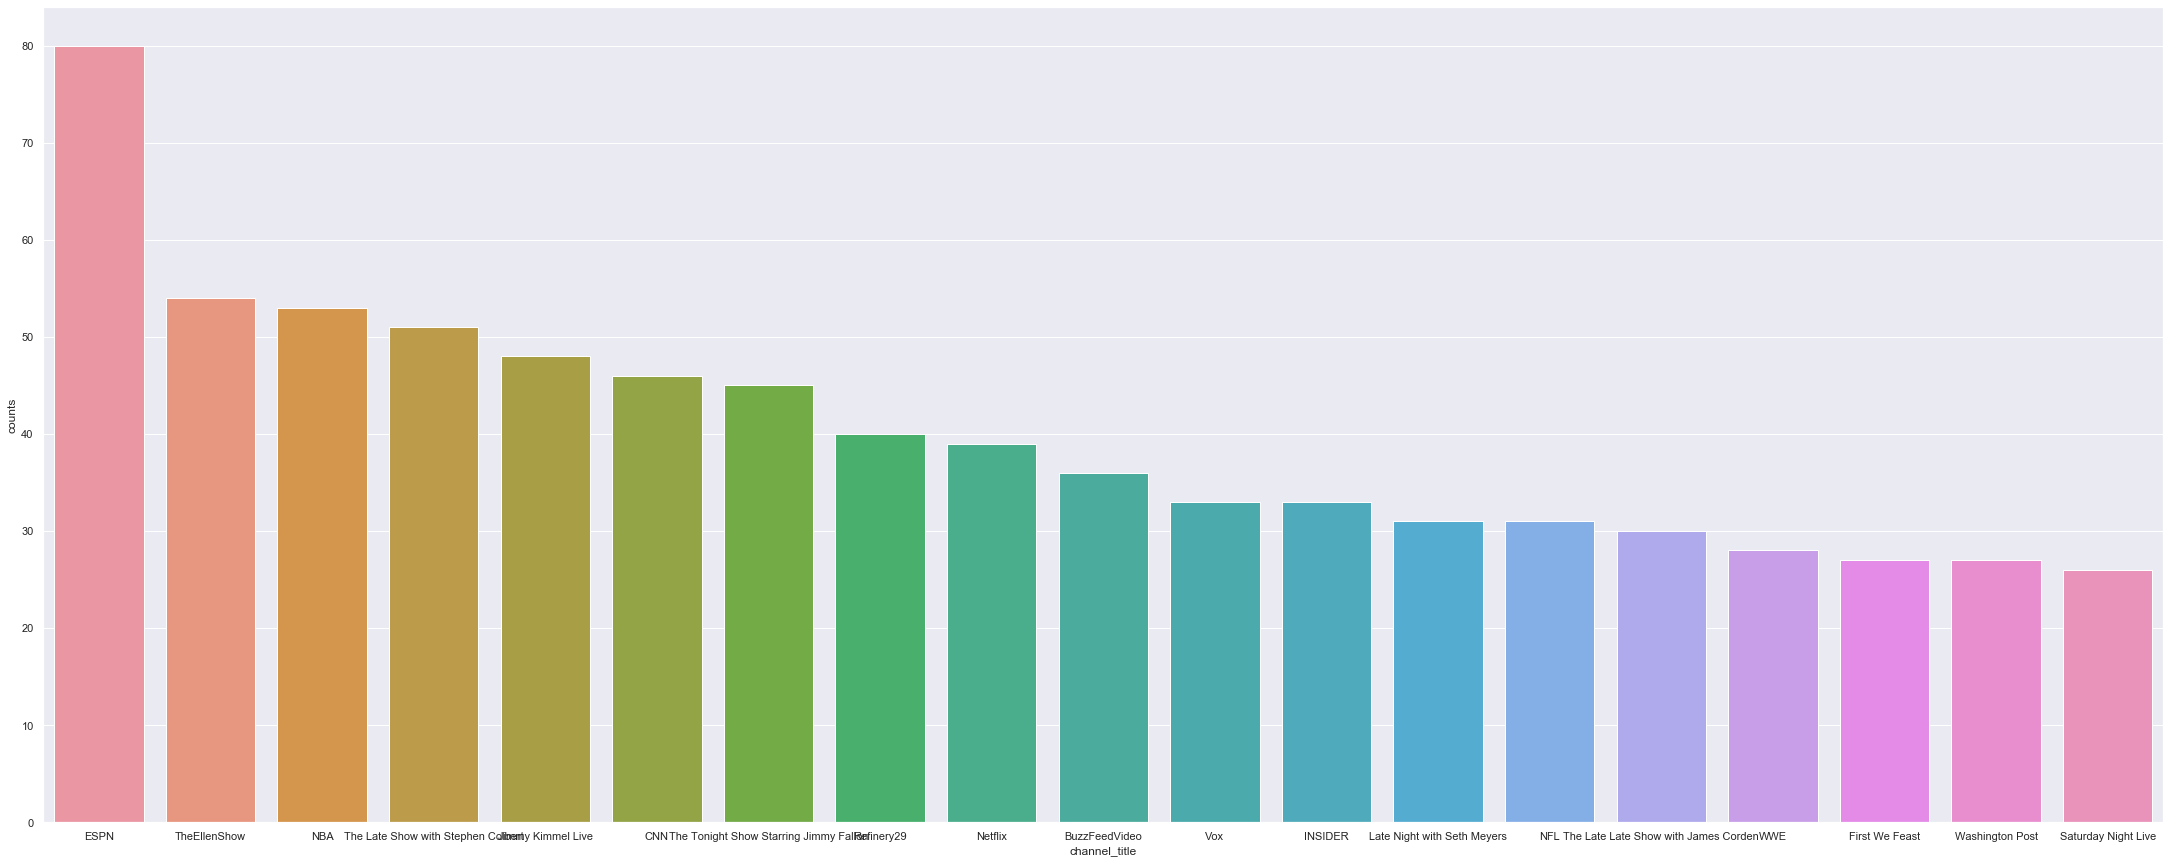

In [39]:
# US channels sorted from highest amount of trending videos to lowest
US_sorted_counts = US_channel_counts.sort_values(by=['counts'], ascending=False)

# Channels with only one trending video
# US_sorted_counts.loc[US_sorted_counts['counts'] == 1] #1211

# US channels with more than 25 trending videos, 19 channels total
US_top_19 = US_sorted_counts.loc[US_sorted_counts['counts'] > 25]

sns.set(rc={'figure.figsize':(38,15)})
sns.barplot(x="channel_title", y="counts", data=US_top_19)

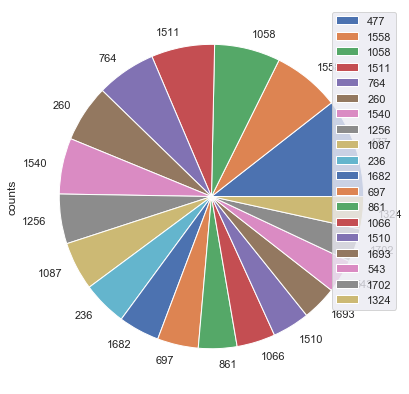

In [38]:
plot = US_top_19.plot.pie(y='counts', figsize=(12, 7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a199b32e8>]],
      dtype=object)

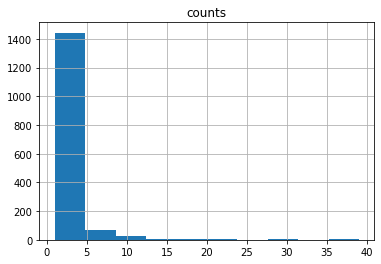

In [12]:
GB_bool = df.country == 'GB'

GB_trending= df.loc[GB_bool]

GB_channel_counts = GB_trending.groupby(['channel_title']).size().reset_index(name='counts')

GB_channel_counts.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19901a58>]],
      dtype=object)

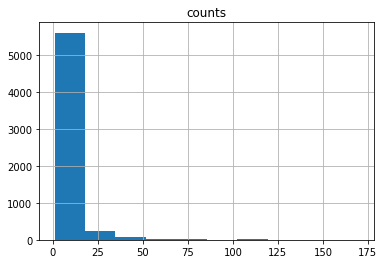

In [13]:
RU_bool = df.country == 'RU'

RU_trending= df.loc[RU_bool]

RU_channel_counts = RU_trending.groupby(['channel_title']).size().reset_index(name='counts')

RU_channel_counts.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b4188d0>]],
      dtype=object)

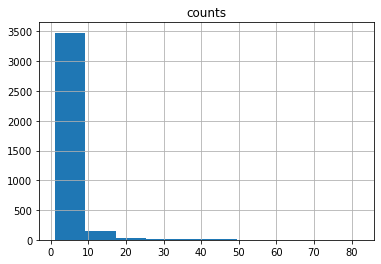

In [14]:
JP_bool = df.country == 'JP'

JP_trending= df.loc[JP_bool]

JP_channel_counts = JP_trending.groupby(['channel_title']).size().reset_index(name='counts')

JP_channel_counts.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b65d438>]],
      dtype=object)

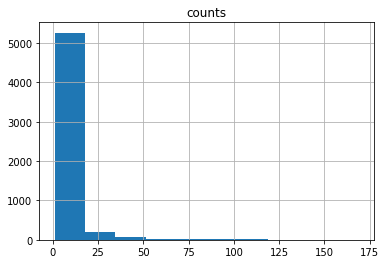

In [15]:
MX_bool = df.country == 'MX'

MX_trending= df.loc[MX_bool]

MX_channel_counts = MX_trending.groupby(['channel_title']).size().reset_index(name='counts')

MX_channel_counts.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b8d62b0>]],
      dtype=object)

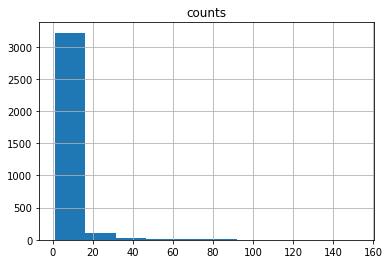

In [16]:
KR_bool = df.country == 'KR'

KR_trending= df.loc[KR_bool]

KR_channel_counts = KR_trending.groupby(['channel_title']).size().reset_index(name='counts')

KR_channel_counts.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1dc67b00>]],
      dtype=object)

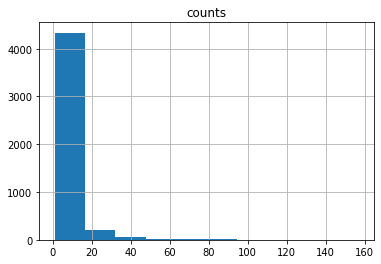

In [17]:
DE_bool = df.country == 'DE'

DE_trending= df.loc[DE_bool]

DE_channel_counts = DE_trending.groupby(['channel_title']).size().reset_index(name='counts')

DE_channel_counts.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e171c88>]],
      dtype=object)

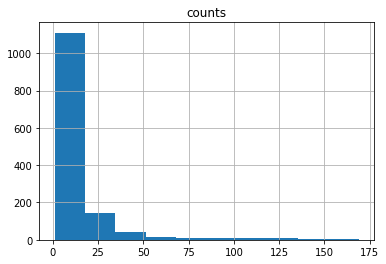

In [18]:
IN_bool = df.country == 'IN'

IN_trending= df.loc[IN_bool]

IN_channel_counts = IN_trending.groupby(['channel_title']).size().reset_index(name='counts')

IN_channel_counts.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e520898>]],
      dtype=object)

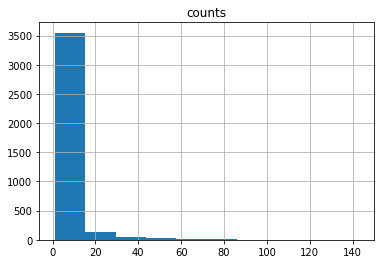

In [19]:
CA_bool = df.country == 'CA'

CA_trending= df.loc[CA_bool]

CA_channel_counts = CA_trending.groupby(['channel_title']).size().reset_index(name='counts')

CA_channel_counts.hist()